# Compressive Sensing

The task is to extract images or signals accurately and even exactly from a number of
samples which is far smaller than the desired resolution of the image/signal, e.g., the
number of pixels in the image. This new technique draws from results in several fields

Suppose we are given a sparse signal.

__Can we recover the signal with small number of measurements 
(far smaller than the desired resolution of the signal)?__

The answer is __YES, for some signals and carefully selected measurements using $l_1$ minimization.__


__Prerequisites__

The reader should be familiar to elementary concepts about signals, with linear algebra concepts, and linear programming.

__Competences__ 

The reader should be able to recover a signal from a small number of measurements.

__References__

For more details see

* [E. Candès and M. Wakin, An Introduction To Compressive Sampling][CW08],
* [M. Davenport et al., Introduction to Compressed Sensing][DDEK12]
* [O. Holtz, Compressive sensing: a paradigm shift in signal processing][Hol08], 
* [G. Kutyniok, Theory and Applications of Compressed Sensing][Kut13]
* and the extensive list of [Compressive Sensing Resources](http://dsp.rice.edu/cs).



__Credits__: Daniel Bragg, an IASTE Intern, performed testing of some of the methods.

[CW08]: https://authors.library.caltech.edu/10092/1/CANieeespm08.pdf "Emmanuel J. Candès and Michael B. Wakin, 'An Introduction To Compressive Sampling',  IEEE Signal Processing Magazine, 25(2) (2008) 21-30."

[DDEK12]: http://www.ecs.umass.edu/~mduarte/images/IntroCS.pdf "Mark A. Davenport, Marco F. Duarte, Yonina C. Eldar and Gitta Kutyniok, 'Introduction to Compressed Sensing', in: Compressed Sensing - Theory and Applications, Cambridge University Press, 2012." 

[Hol08]: http://arxiv.org/abs/0812.3137 "Olga Holtz, 'Compressive sensing: a paradigm shift in signal processing', arXiv:0812.3137, 2008."  

[Kut13]: http://www.math.tu-berlin.de/fileadmin/i26_fg-kutyniok/Kutyniok/Papers/SurveyCompressedSensing_Revision.pdf "Gitta Kutyniok, 'Theory and Applications of Compressed Sensing'"

## Underdetermined systems

Let $A\in\mathbb{R}^{m\times n}$ with $m<n$, $x\in\mathbb{R}^n$ and $b\in\mathbb{R}^m$.

### Definitions

The system $Ax=b$ is __underdetermined__.

$\|x\|_0$ is the number of nonzero entries of $x$ (__a quasi-norm__).

A matrix $A$ satisfies the __restricted isometry property__ (RIP) of order $k$ with constant $\delta_k\in(0,1)$ 
if 

$$
(1 − \delta_k )\|x\|_2^2 \leq \| Ax\|_2^2 \leq (1 + \delta_k)\| x\|_2^2
$$

for any $x$ such that $\|x\|_0 \leq k$.

A __mutual incoherence__ of a matrix $A$ is 

$$
\mathcal{M}(A)= \max_{i \neq j} |[A^TA]_{ij}|,
$$

that is, the absolutely maximal inner product of distinct columns of $A$. If the columns of $A$ have unit
norms, $\mathcal{M}(A)\in[0,1]$.

The __spark__ of a given matrix $A$, $\mathop{\mathrm{spark}}(A)$, is the smallest number of columns of $A$ that are linearly dependant.


### Facts

1. An underdetermined system either has no solution or has infinitely many solutions. 

2. The typical problem is to choose the solution of some minimal norm. This problem can be reformulated as a
constrained optimization problem
$$
\textrm{minimize}\ \|x\| \quad \textrm{subject to} \quad Ax=b.
$$
In particular:
    3. For the 2-norm, the $l_2$ minimization problem is solved by SVD: let $\mathop{\mathrm{rank}}(A)=r$ and let
$A=U\Sigma V^T$ be the SVD of $A$. Then 
$$
x=\sum_{k=1}^r \frac{U[:,k]^Tb}{\sigma_k} V[:,k].
$$
    2. For the 1-norm, the $l_1$ minimization problem is a __linear programming__ problem
    $$\textrm{minimize}\ \ c^T x \quad \textrm{subject to} \quad Ax=b,\ x\geq 0,$$
    for $c^T=\begin{bmatrix}1 & 1 & \cdots & 1 \end{bmatrix}$.
    3. For the 0-norm, the $l_0$ problem (which appears in compressive sensing)
    $$
    \textrm{minimize}\ \|x\|_0 \quad \textrm{subject to} \quad Ax=b,
    $$
    is NP-hard.
4. It holds $\mathop{\mathrm{spark}}(A)\in[2,m+1]$.
5. For any vector $b$, there exists at most one vector $x$ such that $\|x\|_0\leq k$ and 
$Ax=b$ if and only if $\mathop{\mathrm{spark}}(A) > 2k$. This implies that $m\geq 2k$, which is a good choice when we are computing solutions which are exactly sparse.

6. If $k<\displaystyle \frac{1}{2} \left(1+\frac{1}{\mathcal{M}(A)}\right)$, then for any vector $b$ there exists at most one vector $x$ such that $\|x\|_0\leq k$ and $Ax=b$.

7. If the solution $x$ of $l_0$ problem satisfies 
$\|x\|_0 < \displaystyle \frac{\sqrt{2}-1/2}{\mathcal{M}(A)}$, 
then the solution of $l_1$ problem is the solution of $l_0$ problem!

7. If $A$ has columns of unit-norm, then $A$ satisfies the RIP of order $k$ with 
$\delta_k = (k − 1)\mathcal{M}(A)$  for all $k < 1/\mathcal{M}(A)$.

8. If $A$ satisfies RIP of order $2k$ with $\delta_{2k}<\sqrt{2}-1$, then the solution of $l_1$ problem is the solution of $l_0$ problem! 

9. Checking whether the specific matrix has RIP is difficult. 
If $m ≥ C \cdot k \log\left(\displaystyle\frac{n}{k}\right)$, where $C$ is some constant depending on each instance, the following classes of matrices satisfy RIP with $\delta_{2k}<\sqrt{2}-1$ with overwhelming probability(the matrices are normalised to have columns with unit norms):
    1. Form $A$ by sampling at random $n$ column vectors on the unit sphere in $\mathbb{R}^m$.
    2. Form $A$ by sampling entries from the normal distribution with mean 0 and variance 
    $1/ m$.
    3. Form $A$ by sampling entries from a symmetric Bernoulli distribution
    $P(A_{ij} = ±1/\sqrt{m}) = 1/2$.
    4. Form $A$ by sampling at random $m$ rows of the Fourier matrix.

10. The __compressive sensing__ interpretation is the following: the signal $x$ is reconstructed from samples with $m$ __functionals__ (the rows of $A$). 
 

### $l_2$ minimization

In [1]:
using Plots
using Clp
using JuMP
using Distributions
using LinearAlgebra
using SparseArrays
using FFTW
using Random

In [2]:
Random.seed!(678)
m=5
n=8
A=rand(m,n)
b=rand(m)
A

5×8 Array{Float64,2}:
 0.655726   0.281598  0.031207   0.952019   …  0.0400642  0.401826  0.509873
 0.237319   0.513194  0.913369   0.292343      0.198013   0.982805  0.881078
 0.498884   0.394471  0.677593   0.244604      0.751218   0.687313  0.108431
 0.0113688  0.468253  0.157199   0.384663      0.825939   0.537428  0.961668
 0.0362182  0.150309  0.0367145  0.0380349     0.146018   0.13143   0.608996

In [3]:
b

5-element Array{Float64,1}:
 0.4179957693889931
 0.43562304885058234
 0.5852978448978767
 0.09913808966202886
 0.832664764801347

In [4]:
x=A\b
U,σ,V=svd(A)
norm(A*x-b), norm( sum( [(U[:,k]'*b/σ[k])[1]*V[:,k]  for k=1:m])-x)

(1.902016510847628e-15, 1.6782120519281306e-15)

## Small linear programming example

\begin{split}\min_{x,y}\, &-x\\
s.t.\quad          &2x + y \leq 1.5\\
             & x \geq 0, y \geq 0\end{split}

In [5]:
m₀ = Model(with_optimizer(Clp.Optimizer))
@variable(m₀, 0<=x₀)
@variable(m₀, 0 <= y₀)
@objective(m₀, Min, -x₀)
@constraint(m₀, con, 2x₀ + 1y₀ <= 1.5)
optimize!(m₀)

Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value -0.75
Coin0511I After Postsolve, objective -0.75, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -0.75 - 0 iterations time 0.002, Presolve 0.00


In [6]:
termination_status(m₀) == MOI.OPTIMAL

true

In [7]:
objective_value(m₀)

-0.75

In [8]:
value(x₀),value(y₀)

(0.75, 0.0)

## Exact sparse signal recovery

We recover randomly generated sparse signals "measured" with rows of the matrix $A$. 
The experiment is performed for types of matrices from Fact 9.

The $l_1$ minimization problem is solved using the package [JuMP.jl](https://github.com/JuliaOpt/JuMP.jl) with the linear programming solver from the package [Clp.jl](https://github.com/JuliaOpt/Clp.jl).

Random matrices are generated using the package [Distributions.jl](https://github.com/JuliaStats/Distributions.jl).

In [9]:
function SamplingMatrix(m::Int,n::Int,kind::String)
    # kind is "Random" for Fact 9A, "Normal" for 9B, 
    # "Bernoulli" for 9C, and "Fourier" for 9D.
    if kind=="Random"
        A=svd(rand(m,n)).Vt
    elseif kind=="Normal"
        A=rand(Normal(0,1/m),m,n)
    elseif kind=="Bernoulli"
        A=2*(rand(Bernoulli(0.5),m,n).-0.5)
    elseif kind=="Fourier"
        # Elegant way of computing the Fourier matrix
        F=fft(Matrix(I,n,n),1)
        # Select m/2 random rows
        ind=Random.randperm(n)[1:div(m,2)]
        Fm=F[ind,:]
        # We need to work with real matrices
        A=[real(Fm); imag(Fm)]
    else
        return "Error"
    end
    # Normalize columns of A
    for i=1:size(A,2)
        normalize!(view(A,:,i))
    end
    return A
end

SamplingMatrix (generic function with 1 method)

In [10]:
function recovery(A,b)
    model = Model(with_optimizer(Clp.Optimizer))
    @variable(model, 0<=x[1:size(A,2)])
    @objective(model, Min, sum(x))
    @constraint(model, con, A*x .== b)
    optimize!(model)
    if termination_status(model) == MOI.OPTIMAL
        return value.(x)
    else
        return "Error"
    end
end

recovery (generic function with 1 method)

In [11]:
# Random.seed!(421)
# Dimension of the sparse vector
n=200 
# Dimension of the sampled vector
m=50
# Sparsity
k=15
# Generate random sparse vector
x=sprand(n,k/n)
# Generate sampling matrix, "Random", "Normal", "Bernoulli", "Fourier"
kind="Fourier"
A=SamplingMatrix(m,n,kind)
# Check incoherence
maximum(abs,A'*A-I)

0.3189928942666363

In [12]:
# Sample x
b=A*x;

In [13]:
xᵣ=recovery(A,b);

Coin0506I Presolve 50 (0) rows, 200 (0) columns and 9728 (0) elements
Clp0006I 0  Obj 0 Primal inf 2.7638312e+09 (50)
Clp0006I 31  Obj 10.198499 Primal inf 62962302 (36)
Clp0006I 66  Obj 15.290283 Primal inf 2213246.9 (15)
Clp0006I 85  Obj 15.611369
Clp0006I 85  Obj 9.0238647 Dual inf 3.6303665e-06 (16)
Clp0006I 113  Obj 8.6130068
Clp0000I Optimal - objective value 8.6130068
Clp0032I Optimal objective 8.613006846 - 113 iterations time 0.012


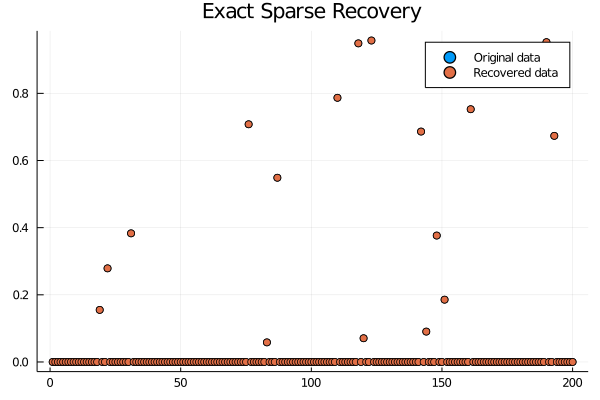

In [14]:
# Plot the solution
scatter(x,title="Exact Sparse Recovery",label="Original data")
scatter!(xᵣ,label="Recovered data")

## Recovery from noisy observations

In the presence of noise in observation, we want to recover a vector $x$ from 
$b=Ax + z$, where $z$ is a stochastic or deterministic unknown error term.

### Definition

The __hard thresholding operator__, $H_k(x)$, sets all but the $k$ entries of $x$ with largest magnitude to zero.

### Facts

1. The problem can be formulated as $l_1$ minimization problem
$$
\textrm{minimize}\ \|x\|_1 \quad \textrm{subject to} \quad \|Ax-b\|_2^2\leq\epsilon,
$$
where $\epsilon$ bounds the amount of noise in the data.

2. Assume that $A$ satisfies RIP of order $2k$ with $\delta_{2k}< \sqrt{2}-1$. Then the solution $x^{\star}$ of the above problem satisfies 
$$
\|x^{\star}-x\|_2 \leq C_0 \displaystyle \frac{1}{\sqrt{k}}\|x-H_k(x)\|_1
+C_1\epsilon,
$$
where $x$ is the original signal.

3. The $l_1$ problem is a convex programming problem and can be efficiently solved. The solution methods are beyond the scope of this course. 

4. If $k$ is known in advance, $A$ satisfies RIP with $\delta_{3k}<1/15$, and $\|A\|_2<1$, the $k$-sparse aproximation of $x$ can be computed
by the __Iterative Hard Thresholding__ algorithm:
    1. __Initialization:__ $x=0$.
    2. __Iteration:__ repeat until convergence $x=H_k(x+A^T(b-Ax))$.

In [15]:
# Iterative Hard Thresholding 
function H(x::Vector,k::Int)
    y=copy(x)
    ind=sortperm(abs.(y),rev=true)
    y[ind[k+1:end]].=0
    y
end

H (generic function with 1 method)

In [16]:
function IHT(A::Matrix, b::Vector,k::Int)
    # Tolerance
    τ=1e-12
    x=zeros(size(A,2))
    for i=1:50*m
        x=H(x+A'*(b-A*x),k)
    end
    x
end

IHT (generic function with 1 method)

###  Example

We construct the $k$ sparse $x$, form $b$, add noise, and recover it with the algorithm from Fact 4. The conditions on $A$ are rather restrictive, which means that $k$ must be rather small compared to $n$ and $m$ must be rather large. For convergence, we limit the number of iterations to $50m$.

In [17]:
Random.seed!(421)
# Dimension of the sparse vector
nₙ=300
# Sparsity - kₙ is small compared to nₙ
kₙ=8
# Dimension of the sampled vector - mₙ is rather large
mₙ=5*round(Int,kₙ*log(nₙ/kₙ))
# Generate random sparse vector
xₙ=10*sprand(nₙ,kₙ/nₙ)
# Generate sampling matrix
Aₙ=SamplingMatrix(mₙ,nₙ,"Normal");

In [18]:
# Sample xₙ
bₙ=Aₙ*xₙ
# Add noise
noise=rand(mₙ)*1e-5
bₙ.+=noise

145-element Array{Float64,1}:
  0.8503810215494615
  0.7209423916935749
 -0.10279686745535374
  0.270660384049195
  2.0635469484655395
  0.8818557267025563
 -1.3410600678063016
 -0.682180644239332
  0.7785560253425635
 -1.2665264591046663
 -2.219329907768813
 -1.2567991523178474
  1.5016911993977136
  ⋮
  2.1189417917034823
  0.9339282291198718
  0.9904888659026649
 -0.4533693500538272
  0.3649866897428718
 -2.7557941076506447
 -0.5900895405360865
  0.9816167616602459
  0.8089891782439453
 -1.4614970404343337
  1.3359437978756368
 -0.12694494229944792

In [19]:
yₙ=IHT(Aₙ,bₙ,kₙ)
norm(Aₙ*xₙ-bₙ)/norm(bₙ)

4.5456358163346505e-6

In [20]:
xₙ

300-element SparseVector{Float64,Int64} with 7 stored entries:
  [41 ]  =  7.85847
  [84 ]  =  1.35538
  [126]  =  9.58365
  [248]  =  5.60486
  [257]  =  6.08612
  [279]  =  3.46561
  [290]  =  5.61248

In [21]:
sparse(yₙ)

300-element SparseVector{Float64,Int64} with 8 stored entries:
  [41 ]  =  7.85848
  [84 ]  =  1.35539
  [126]  =  9.58365
  [248]  =  5.60487
  [257]  =  6.08612
  [271]  =  1.89823e-5
  [279]  =  3.46562
  [290]  =  5.61249

Let us try linear programing in the case of noisy observations.

In [22]:
zₙ=recovery(Aₙ,bₙ);

Coin0506I Presolve 145 (0) rows, 300 (0) columns and 43500 (0) elements
Clp0006I 0  Obj 0 Primal inf 37080.478 (145)
Clp0006I 31  Obj 39.566731 Primal inf 0.40870485 (127)
Clp0006I 77  Obj 39.567085 Primal inf 0.26677701 (96)
Clp0006I 145  Obj 39.567574 Primal inf 0.16204451 (76)
Clp0006I 179  Obj 39.567974 Primal inf 1.4522433 (74)
Clp0006I 210  Obj 39.56846 Primal inf 0.052552739 (56)
Clp0006I 255  Obj 39.568889 Primal inf 0.0072048133 (42)
Clp0006I 293  Obj 39.56918 Primal inf 3.8301988e-05 (11)
Clp0006I 302  Obj 39.56919
Clp0000I Optimal - objective value 39.56919
Clp0032I Optimal objective 39.56919027 - 302 iterations time 0.052


In [23]:
sparse(zₙ)

300-element SparseVector{Float64,Int64} with 145 stored entries:
  [1  ]  =  4.47704e-5
  [3  ]  =  1.1835e-5
  [6  ]  =  1.38801e-5
  [8  ]  =  1.32565e-6
  [14 ]  =  3.1925e-5
  [16 ]  =  1.43964e-5
  [17 ]  =  8.83499e-6
  [18 ]  =  7.64988e-6
  [20 ]  =  1.47996e-5
  [29 ]  =  2.98674e-5
         ⋮
  [277]  =  2.59415e-6
  [279]  =  3.4656
  [283]  =  8.16372e-6
  [286]  =  3.03657e-5
  [287]  =  4.1698e-6
  [288]  =  3.39503e-5
  [290]  =  5.61248
  [292]  =  5.56362e-6
  [293]  =  8.06218e-6
  [297]  =  1.00429e-6
  [299]  =  5.63498e-6

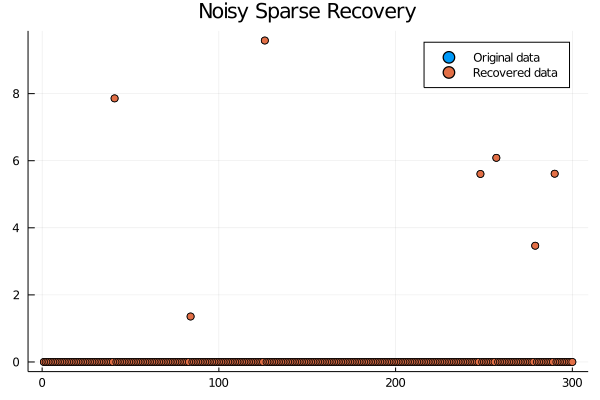

In [24]:
# Plot the solution
scatter(xₙ,title="Noisy Sparse Recovery",label="Original data")
scatter!(zₙ,label="Recovered data")

## Sensing images

Wavelet transformation of an image is essentially sparse, since only small number of cofficients is significant. This fact can be used for compression.

Wavelet transforms are implemented the package 
[Wavelets.jl](https://github.com/JuliaDSP/Wavelets.jl).

### Lena and R

The `tif` version of the image "Lena" has `65_798` bytes, the `png` version has `58_837` bytes, and the `jpeg` version has `26_214` bytes. We also test the algorithm on a simpler image of letter "R".

In [25]:
using Wavelets
using Images
using TestImages

In [26]:
println(TestImages.remotefiles)

["autumn_leaves.png", "blobs.gif", "cameraman.tif", "earth_apollo17.jpg", "fabio_color_256.png", "fabio_color_512.png", "fabio_gray_256.png", "fabio_gray_512.png", "hela-cells.tif", "house.tif", "jetplane.tif", "lake_color.tif", "lake_gray.tif", "lena_color_256.tif", "lena_color_512.tif", "lena_gray_256.tif", "lena_gray_512.tif", "lena_gray_16bit.png", "livingroom.tif", "lighthouse.png", "mandril_color.tif", "mandril_gray.tif", "mandrill.tiff", "m51.tif", "moonsurface.tiff", "mountainstream.png", "mri-stack.tif", "multi-channel-time-series.ome.tif", "peppers_color.tif", "peppers_gray.tif", "pirate.tif", "resolution_test_512.tif", "resolution_test_1920.tif", "toucan.png", "walkbridge.tif", "woman_blonde.tif", "woman_darkhair.tif"]


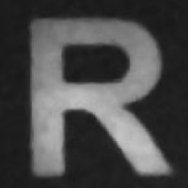

In [27]:
# img=testimage("lena_gray_256.tif")
img=map(Gray,load("./files/RDuarte.png"))

In [28]:
typeof(img)

Array{Gray{Normed{UInt8,8}},2}

In [29]:
size(img)

(188, 188)

In [30]:
show(img[1,1])

Gray{N0f8}(0.11)

In [31]:
# Convert the image to 32 or 64 bit floats
x=map(Float32,img)
" Number of matrix elements = ",prod(size(x)), 
" Bytes = ",sizeof(x), size(x)

(" Number of matrix elements = ", 35344, " Bytes = ", 141376, (188, 188))

In [32]:
# Compute the wavelet transform of x or wavelet(WT.db3)
wlet=wavelet(WT.Coiflet{4}(), WT.Filter, WT.Periodic)
xₜ=dwt(x,wlet,2);

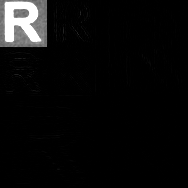

In [33]:
colorview(Gray,real(xₜ))

We now set all but the 10% or 5% absolutely largest coefficients to zero and reconstruct the image. The images are very similar, which illustrates that the wavelet transform of an image is essentially sparse.

In [34]:
ind=sortperm(abs.(vec(xₜ)),rev=true)
# 0.1 = 10%, try also 0.05 = 5%
τ=0.05
kₜ=round(Int,τ*length(ind))
xsparse=copy(xₜ)
xsparse[ind[kₜ+1:end]].=0;

In [35]:
nnz(sparse(xsparse))

1767

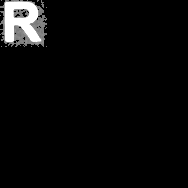

In [36]:
colorview(Gray,xsparse)

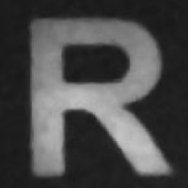

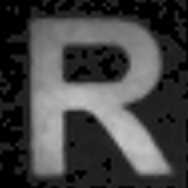

In [37]:
# Inverse wavelet transform of the sparse data
imgsparse=idwt(xsparse,wlet,2)
# Original and sparse image
display(img)
display(colorview(Gray,imgsparse))

There are $k=6554$  $(3277)$ nonzero coefficients in a sparse wavelet representation. 

Is there the sensing matrix which can be used to sample and recover `xsparse`?

Actual algorithms are elaborate. For more details see [J. Romberg, Imaging via Compressive Sampling][Rom08] and [Duarte et al.,Single-Pixel Imaging via Compressive Sampling][Dua08].


[Rom08]: http://dsp.rice.edu/files/cs/Imaging-via-CS.pdf "Justin Romberg, 'Imaging via Compressive Sampling', IEEE Signal Processing Magazine, 25(2) (2008) 14-20."

[Dua08]: http://www.wisdom.weizmann.ac.il/~vision/courses/2010_2/papers/csCamera-SPMag-web.pdf "Marco F. Duarte, Mark A. Davenport, Dharmpal Takhar, Jason N. Laska, Ting Sun, Kevin F. Kelly, and Richard G. Baraniuk, 'Single-Pixel Imaging via Compressive Sampling', IEEE Signal Processing Magazine, March 2008, 83-91."

In [38]:
nnz(sparse(xsparse))

1767

In [39]:
# Maximal number of nonzeros in a column 
maximum([nnz(sparse(xsparse[:,i])) for i=1:size(x,2)])

46

In [40]:
# Dimensions
nᵢ=size(xsparse,2)
mᵢ=150
Aᵢ=SamplingMatrix(mᵢ,nᵢ,"Normal")
# Sampling (columnwise)
bᵢ=Aᵢ*xsparse

150×188 Array{Float64,2}:
  0.0371859     0.243568    0.268015    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.159712     -0.05149     0.0930536      0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0958473     0.01783    -0.0959132      0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0313606    -0.14846    -0.233372       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0720044    -0.0819249   0.108094       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0958572    -0.0487577  -0.0327988   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0614392    -0.0728411  -0.19636        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.190265     -0.0386689  -0.0142551      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0170767    -0.319022   -0.113999       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0044873     0.105539    0.0768554      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0302378    -0.129578   -0.0405234   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.177647      0.180192    0.0608023      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.222533      0.0433078  -0.016903       0.0  0.

In [41]:
# Recovery columnwise
xrecover=similar(xsparse)
for l=1:size(xsparse,2)
    zᵢ=recovery(Aᵢ,bᵢ[:,l])
    xrecover[:,l]=zᵢ
end

Coin0506I Presolve 150 (0) rows, 188 (0) columns and 28200 (0) elements
Clp0006I 0  Obj 0 Primal inf 3669.6861 (150)
Clp0006I 22  Obj 3.8034825
Clp0000I Optimal - objective value 3.8034825
Clp0032I Optimal objective 3.803482503 - 22 iterations time 0.002
Coin0506I Presolve 150 (0) rows, 188 (0) columns and 28200 (0) elements
Clp0006I 0  Obj 0 Primal inf 3915.5806 (150)
Clp0006I 31  Obj 5.6274797 Primal inf 10279.22 (134)
Clp0006I 35  Obj 6.1721458
Clp0000I Optimal - objective value 6.1721458
Clp0032I Optimal objective 6.172145754 - 35 iterations time 0.012
Coin0506I Presolve 150 (0) rows, 188 (0) columns and 28200 (0) elements
Clp0006I 0  Obj 0 Primal inf 4761.0912 (150)
Clp0006I 31  Obj 5.7599678 Primal inf 15414.068 (134)
Clp0006I 48  Obj 7.6863504
Clp0000I Optimal - objective value 7.6863504
Clp0032I Optimal objective 7.686350405 - 48 iterations time 0.012
Coin0506I Presolve 150 (0) rows, 188 (0) columns and 28200 (0) elements
Clp0006I 0  Obj 0 Primal inf 6475.3452 (150)
Clp0006I 31

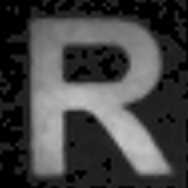

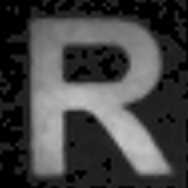

In [44]:
imgrecover=idwt(xrecover, wlet, 2)
# imgrecover=idct(xrecover)
# Original and recovered image
display(colorview(Gray,imgsparse))
display(colorview(Gray,imgrecover))